In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data set and setting the date columns as index

In [56]:
quarter_kwh = pd.read_csv('./quarter_hour-profile-dm28.csv', encoding='utf-8' )
quarter_kwh['Date'] = pd.to_datetime(quarter_kwh['Date'], dayfirst=True)
# quarter_kwh['Electric_power_kW'] = pd.to_numeric(quarter_kwh['Electric_power_kW'], downcast="float")
# quarter_kwh['Electric_power_kWh'] = quarter_kwh['Electric_power_kW'] * 15/60
quarter_kwh.set_index('Date', inplace=True)
quarter_kwh.head()

,Electric_power_kW
Date,
2008-01-01 00:00:00,57.6
2008-01-01 00:15:00,57.6
2008-01-01 00:30:00,57.6
2008-01-01 00:45:00,57.6
2008-01-01 01:00:00,57.6


In [57]:
print(f' The dataset contains data for {(quarter_kwh.index[-1].date()-quarter_kwh.index[0].date()).days + 1} days')
ndays = int(quarter_kwh['Electric_power_kW'].count()*15/60*1/24)
print(f' The dataset effectively has data for {ndays} days')
ndays_notnull = int(quarter_kwh['Electric_power_kW'].notnull().count()*15/60*1/24)
print(f' The dataset has not null data for {ndays_notnull} days')

 The dataset contains data for 1430 days
 The dataset effectively has data for 1430 days
 The dataset has not null data for 1430 days


In [58]:
quarter_kwh.shape

(137280, 1)

In [59]:
quarter_kwh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137280 entries, 2008-01-01 00:00:00 to 2011-11-30 23:45:00
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Electric_power_kW  137280 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


Text(0, 0.5, 'Power demand [kW]')

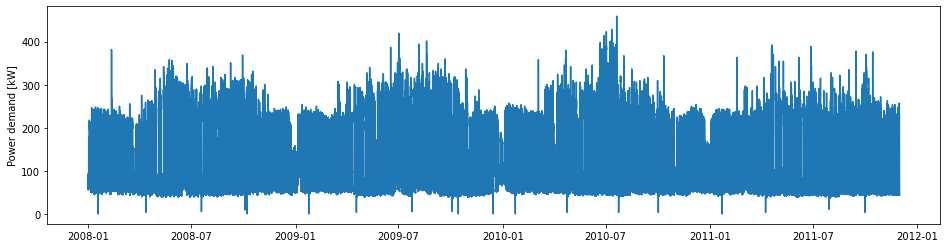

In [60]:
plt.figure(figsize=(16,4))
plt.plot(quarter_kwh['Electric_power_kW'])
plt.ylabel('Power demand [kW]')

## Changing time scale: From 15 min time step to 1 h

In [61]:
hour_kwh = quarter_kwh.resample('h').mean()
# hour_kwh = quarter_kwh.groupby(quarter_kwh.index.to_period('H'), axis=0).mean()
hour_kwh.shape

(34320, 1)

In [62]:
hour_kwh['Electric_power_kW'].count()*1/24

1429.8333333333333

In [63]:
print(f' After conversion dataset contains data for {(hour_kwh.index[-1].date()-hour_kwh.index[0].date()).days + 1} days')
ndays = hour_kwh['Electric_power_kW'].count()*1/24
print(f' The dataset effectively has data for {ndays} days')
ndays_notnull = hour_kwh['Electric_power_kW'].notnull().count()*1/24
print(f' The dataset has not null data for {ndays_notnull} days')

 After conversion dataset contains data for 1430 days
 The dataset effectively has data for 1429.8333333333333 days
 The dataset has not null data for 1430.0 days


In [64]:
hour_kwh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34320 entries, 2008-01-01 00:00:00 to 2011-11-30 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Electric_power_kW  34316 non-null  float64
dtypes: float64(1)
memory usage: 536.2 KB


## Adding useful date attributes

In [81]:
hour_kwh['dow'] = hour_kwh.index.dayofweek +1 # day of week Monday:1 -> Sunday: 7
hour_kwh['doy'] = hour_kwh.index.dayofyear # day of year 1 - 366 (leap year)
hour_kwh['year'] = hour_kwh.index.year # year
hour_kwh['month'] = hour_kwh.index.month # month of the year 1 - 12
hour_kwh['quarter'] = hour_kwh.index.quarter # quarter of the year 1 - 4
hour_kwh['hour'] = hour_kwh.index.hour # hour of day 0 - 23
hour_kwh['weekday'] = hour_kwh.index.day_name() # name of the day Monday - Sunday
hour_kwh['woy'] = hour_kwh.index.weekofyear # Week of year 1 - 53
hour_kwh['dom'] = hour_kwh.index.day # Day of month 1 - 31
hour_kwh['date'] = hour_kwh.index.date # Date
hour_kwh['how'] = (hour_kwh['dow'] - 1)* 24 + (hour_kwh['hour'] + 1) # hour of week 1 - 144
hour_kwh['mnw'] = np.arange(1, hour_kwh.shape[0]+1)//24//7 + 1 # number of measure weeks

### Plotting all the data set (hour by hour - 4 years)

Text(0, 0.5, 'Power demand [kW]')

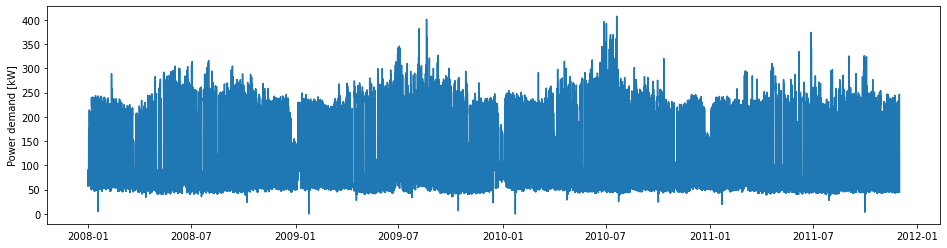

In [68]:
plt.figure(figsize=(16,4))
plt.plot(hour_kwh['Electric_power_kW'])
plt.ylabel('Power demand [kW]')

<AxesSubplot:xlabel='Electric_power_kW', ylabel='Count'>

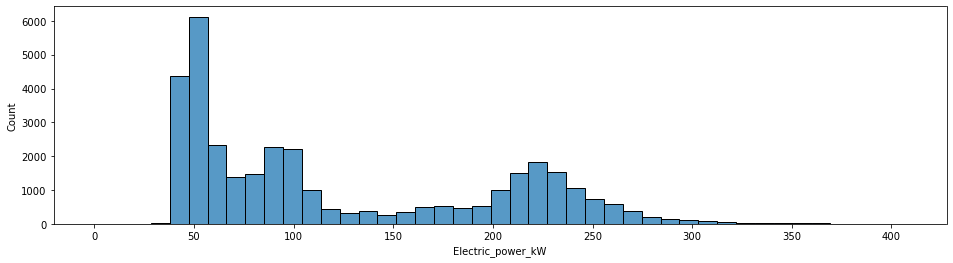

In [69]:
plt.figure(figsize=(16,4))
sns.histplot(x='Electric_power_kW',data=hour_kwh)

In [85]:
hour_kwh_matrix_week = hour_kwh.pivot_table(index='mnw',columns='how',values='Electric_power_kW',aggfunc='sum').fillna(0)

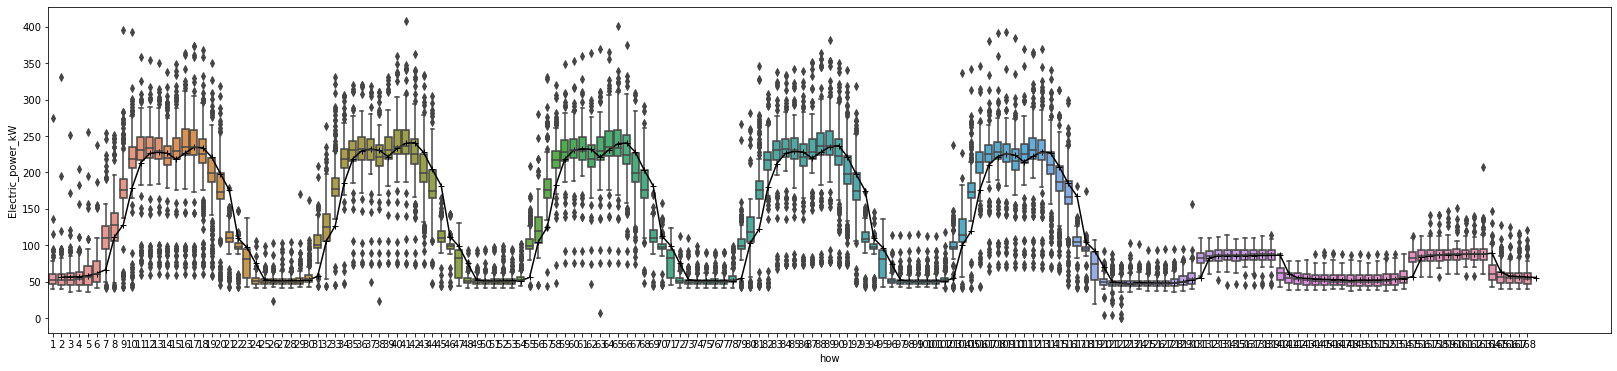

In [90]:
plt.figure(figsize=(28,6))
sns.boxplot(x='how', y='Electric_power_kW',data=hour_kwh)
plt.plot(hour_kwh_matrix_week.columns, hour_kwh_matrix_week.describe().loc['mean'], 'k+-')

In [71]:
hour_kwh_matrix = hour_kwh.pivot_table(index='date',columns='hour',values='Electric_power_kW',aggfunc='sum').fillna(0)

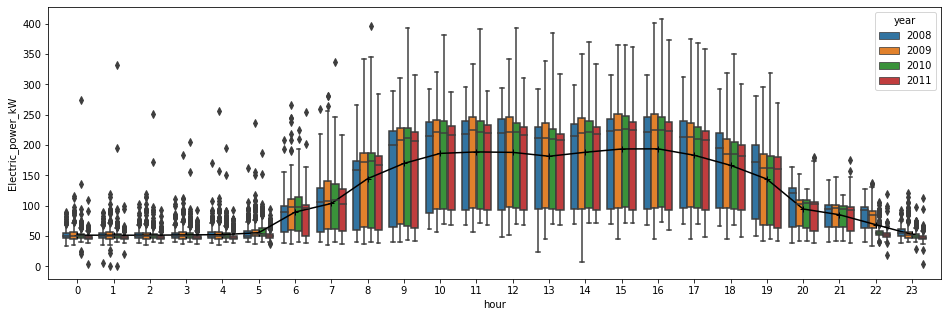

In [72]:
plt.figure(figsize=(16,5))
sns.boxplot(x='hour', y='Electric_power_kW',data=hour_kwh, hue='year')
plt.plot(hour_kwh_matrix.columns, hour_kwh_matrix.describe().loc['mean'], 'k+-')

In [73]:
hour_kwh_matrix.round(0).describe()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,51.622378,51.439161,51.554545,51.943357,52.462937,55.625175,89.568531,103.759441,144.651748,169.809790,...,188.212587,193.615385,193.870629,183.270629,166.635664,144.040559,94.709790,85.230769,68.852448,52.799301
std,10.624914,12.091620,11.209415,11.046261,12.666015,14.039011,32.139662,42.587146,66.897060,78.758341,...,72.382882,76.151880,76.573520,71.525252,62.402446,62.982518,28.805452,21.979917,20.477332,9.181225
min,4.000000,0.000000,0.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,40.000000,...,7.000000,45.000000,46.000000,46.000000,45.000000,43.000000,38.000000,39.000000,19.000000,4.000000
25%,46.000000,46.000000,46.000000,46.000000,46.000000,48.000000,57.000000,59.000000,62.000000,65.000000,...,95.000000,95.000000,95.000000,96.000000,95.000000,71.000000,63.000000,62.000000,52.000000,47.000000
50%,50.000000,50.000000,50.000000,50.000000,49.000000,52.000000,96.000000,106.000000,168.000000,207.000000,...,219.000000,224.500000,224.000000,211.000000,186.000000,164.000000,104.000000,95.000000,59.000000,51.000000
75%,54.000000,54.000000,54.000000,54.000000,55.000000,58.000000,105.000000,134.000000,183.000000,225.000000,...,238.000000,245.000000,245.000000,232.000000,207.000000,185.000000,112.000000,99.000000,90.000000,56.000000
max,274.000000,332.000000,252.000000,205.000000,256.000000,237.000000,266.000000,337.000000,396.000000,392.000000,...,369.000000,365.000000,407.000000,375.000000,350.000000,319.000000,181.000000,175.000000,137.000000,121.000000


In [74]:
hour_kwh_matrix_week = hour_kwh[hour_kwh['dow']<6].pivot_table(index='date',columns='hour',values='Electric_power_kW',aggfunc='sum').fillna(0)

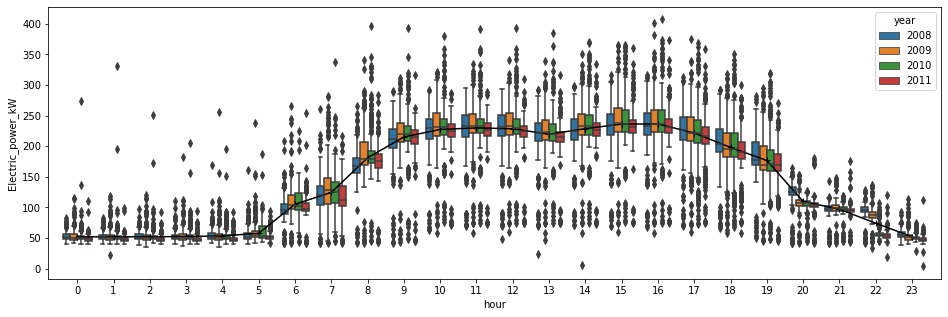

In [75]:
plt.figure(figsize=(16,5))
sns.boxplot(x='hour', y='Electric_power_kW',data=hour_kwh[hour_kwh['dow']<6], hue='year')
plt.plot(hour_kwh_matrix.columns, hour_kwh_matrix_week.describe().loc['mean'], 'k+-')

<AxesSubplot:xlabel='Electric_power_kW', ylabel='Count'>

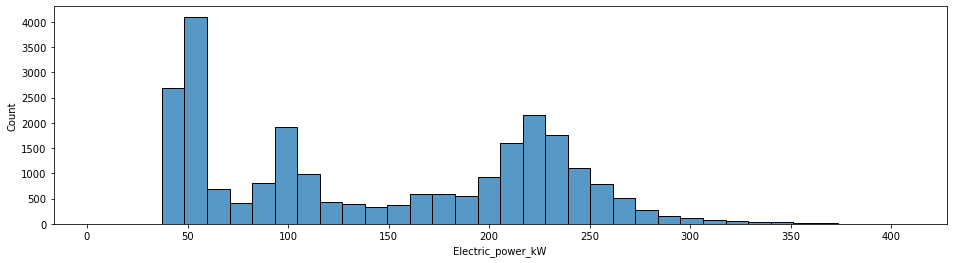

In [76]:
plt.figure(figsize=(16,4))
sns.histplot(x='Electric_power_kW',data=hour_kwh[hour_kwh['dow']<6])

In [77]:
hour_kwh_matrix_weekend = hour_kwh[hour_kwh['dow']>=6].pivot_table(index='date',columns='hour',values='Electric_power_kW',aggfunc='sum').fillna(0)

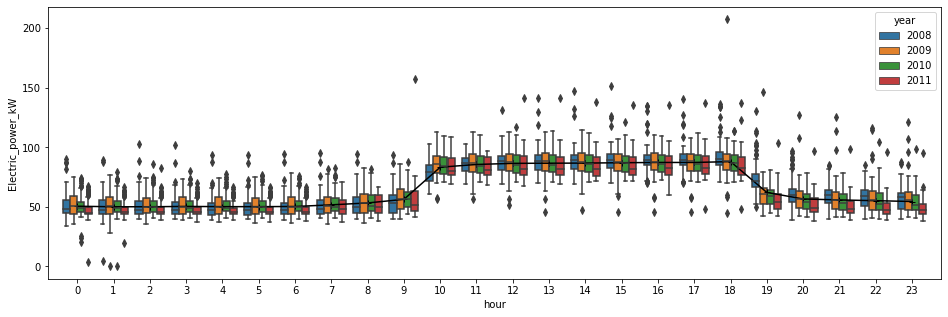

In [78]:
plt.figure(figsize=(16,5))
sns.boxplot(x='hour', y='Electric_power_kW',data=hour_kwh[hour_kwh['dow']>=6], hue='year')
plt.plot(hour_kwh_matrix.columns, hour_kwh_matrix_weekend.describe().loc['mean'], 'k+-')

<AxesSubplot:xlabel='Electric_power_kW', ylabel='Count'>

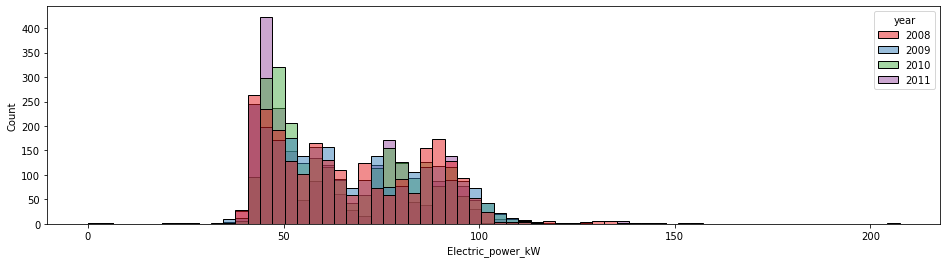

In [79]:
plt.figure(figsize=(16,4))
sns.histplot(x='Electric_power_kW',data=hour_kwh[hour_kwh['dow']>=6], hue='year', palette='Set1')

Text(33.0, 0.5, 'Building class')

Error in callback <function flush_figures at 0x000002854C49B670> (for post_execute):


KeyboardInterrupt: 